In [1]:
!python3 -m venv venv
!source venv/bin/activate
!pip3 install --upgrade pip
!ipython kernel install --user --name=.venv

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
DEPRECATION: libtorrent 2.0.5-build-libtorrent-rasterbar-qrM5vM-libtorrent-rasterbar-2.0.5-bindings-python has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of libtorrent or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Installed kernelspec .venv in /home/onur/.local/share/jupyter/kernels/.venv


In [ ]:
!pip3 install hls4ml[profiling] pydot scikit-learn graphviz tensorflow numpy matplotlib
# !git clone https://github.com/fastmachinelearning/hls4ml-tutorial

# %cd hls4ml-tutorial

In [1]:
import os, plotting, hls4ml
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from matplotlib.lines import Line2D
from matplotlib.legend import Legend

from callbacks import all_callbacks

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

2023-11-08 22:11:51.431380: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 22:11:51.433428: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 22:11:51.460664: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 22:11:51.460692: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 22:11:51.460710: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

/home/onur/personal-files/SiWave/HLS4ML/.venv/lib/python3.10/site-packages/hls4ml/converters/__init__.py:24: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [2]:
if os.path.exists('data'):
  print('Folder data\ already created.')
else:
  os.mkdir('data')
  print('Folder data/ created.')

Folder data/ created.


In [3]:
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, y = data['data'], data['target']

/home/onur/personal-files/SiWave/HLS4ML/.venv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(data['feature_names'])
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

['zlogz', 'c1_b0_mmdt', 'c1_b1_mmdt', 'c1_b2_mmdt', 'c2_b1_mmdt', 'c2_b2_mmdt', 'd2_b1_mmdt', 'd2_b2_mmdt', 'd2_a1_b1_mmdt', 'd2_a1_b2_mmdt', 'm2_b1_mmdt', 'm2_b2_mmdt', 'n2_b1_mmdt', 'n2_b2_mmdt', 'mass_mmdt', 'multiplicity']
(830000, 16) (830000,)
      zlogz  c1_b0_mmdt  c1_b1_mmdt  c1_b2_mmdt  c2_b1_mmdt  c2_b2_mmdt  \
0 -2.935125    0.383155    0.005126    0.000084    0.009070    0.000179   
1 -1.927335    0.270699    0.001585    0.000011    0.003232    0.000029   
2 -3.112147    0.458171    0.097914    0.028588    0.124278    0.038487   
3 -2.666515    0.437068    0.049122    0.007978    0.047477    0.004802   
4 -2.484843    0.428981    0.041786    0.006110    0.023066    0.001123   

   d2_b1_mmdt  d2_b2_mmdt  d2_a1_b1_mmdt  d2_a1_b2_mmdt  m2_b1_mmdt  \
0    1.769445    2.123898       1.769445       0.308185    0.135687   
1    2.038834    2.563099       2.038834       0.211886    0.063729   
2    1.269254    1.346238       1.269254       0.246488    0.115636   
3    0.966505  

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

In [6]:
np.save(os.path.join('data', 'X_train_val.npy'), X_train_val)
np.save(os.path.join('data', 'X_test.npy'), X_test)
np.save(os.path.join('data', 'y_train_val.npy'), y_train_val)
np.save(os.path.join('data', 'y_test.npy'), y_test)
np.save(os.path.join('data', 'classes.npy'), le.classes_)

os.environ['PATH'] += os.pathsep + '/home/onur/Xilinx/Vivado/2023.2/bin'

In [7]:
model = Sequential()

model.add(Dense(64, input_shape=(16,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(5, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 64)                1088      
                                                                 
 relu1 (Activation)          (None, 64)                0         
                                                                 
 fc2 (Dense)                 (None, 32)                2080      
                                                                 
 relu2 (Activation)          (None, 32)                0         
                                                                 
 fc3 (Dense)                 (None, 32)                1056      
                                                                 
 relu3 (Activation)          (None, 32)                0         
                                                                 
 output (Dense)              (None, 5)                 1

2023-11-08 22:12:22.548717: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 22:12:22.549039: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
train = True

if train:
  adam = Adam(lr=0.0001)
  model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
  callbacks = all_callbacks(stop_patience = 1000, lr_factor = 0.5, lr_patience = 10, lr_epsilon = 0.000001, lr_cooldown = 2, lr_minimum = 0.0000001, outputDir = 'jet_tagging_keras')
  model.fit(X_train_val, y_train_val, batch_size = 1024, epochs = 100, validation_split = 0.25, shuffle = True, callbacks = callbacks.callbacks)
  model_json = model.to_json()

  with open('jet_tagging_keras/jet_tagging.json', 'w') as json_file:
    json_file.write(model_json)

else:
  model = load_model('jet_tagging_keras/KERAS_check_best_model.h5')

Epoch 1/100
  1/487 [..............................] - ETA: 3:58 - loss: 1.7181 - accuracy: 0.2354WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0013s vs `on_train_batch_end` time: 0.0019s). Check your callbacks.


466/487 [===========================>..] - ETA: 0s - loss: 0.9522 - accuracy: 0.6865
***callbacks***
saving losses to jet_tagging_keras/losses.log

Epoch 1: val_loss improved from inf to 0.82935, saving model to jet_tagging_keras/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.82935, saving model to jet_tagging_keras/KERAS_check_best_model_weights.h5

Epoch 1: saving model to jet_tagging_keras/KERAS_check_model_last.h5

Epoch 1: saving model to jet_tagging_keras/KERAS_check_model_last_weights.h5

***callbacks end***

487/487 [==============================] - 1s 2ms/step - loss: 0.9467 - accuracy: 0.6884 - val_loss: 0.8294 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 2/100
111/487 [=====>........................] - ETA: 0s - loss: 0.8168 - accuracy: 0.7341

/home/onur/personal-files/SiWave/HLS4ML/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/487 [===========================>..] - ETA: 0s - loss: 0.7985 - accuracy: 0.7408
***callbacks***
saving losses to jet_tagging_keras/losses.log

Epoch 2: val_loss improved from 0.82935 to 0.78193, saving model to jet_tagging_keras/KERAS_check_best_model.h5

Epoch 2: val_loss improved from 0.82935 to 0.78193, saving model to jet_tagging_keras/KERAS_check_best_model_weights.h5

Epoch 2: saving model to jet_tagging_keras/KERAS_check_model_last.h5

Epoch 2: saving model to jet_tagging_keras/KERAS_check_model_last_weights.h5

***callbacks end***

487/487 [==============================] - 1s 2ms/step - loss: 0.7978 - accuracy: 0.7410 - val_loss: 0.7819 - val_accuracy: 0.7450 - lr: 0.0010
Epoch 3/100
474/487 [============================>.] - ETA: 0s - loss: 0.7661 - accuracy: 0.7496
***callbacks***
saving losses to jet_tagging_keras/losses.log

Epoch 3: val_loss improved from 0.78193 to 0.76420, saving model to jet_tagging_keras/KERAS_check_best_model.h5

Epoch 3: val_loss improved from 

5188/5188 [==============================] - 4s 679us/step
Accuracy: 0.7653493975903615


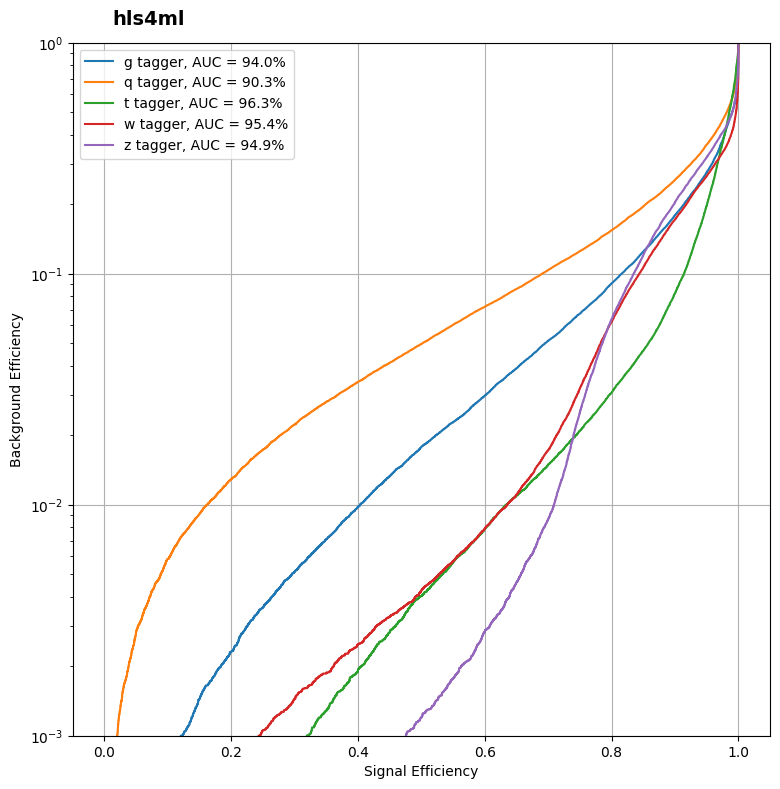

In [9]:
y_keras = model.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
plt.figure(figsize=(9,9))
_ = plotting.makeRoc(y_test, y_keras, le.classes_)

In [10]:
config = hls4ml.utils.config_from_keras_model(model, granularity='model')
print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model, hls_config=config, output_dir='model_1/hls4ml_prj', part='xcu250-figd2104-2L-e')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 5]], output shape: [None, 5]
-----------------------------------
Configuration
Model
  Precision:         fixed<16,6>
  ReuseFactor:       1
  Strategy:    

In [11]:
hls_model.compile()
X_test = np.ascontiguousarray(X_test)
y_hls = hls_model.predict(X_test)

Writing HLS project
Done


/home/onur/personal-files/SiWave/HLS4ML/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Keras  Accuracy: 0.7653493975903615
hls4ml Accuracy: 0.7656204819277108


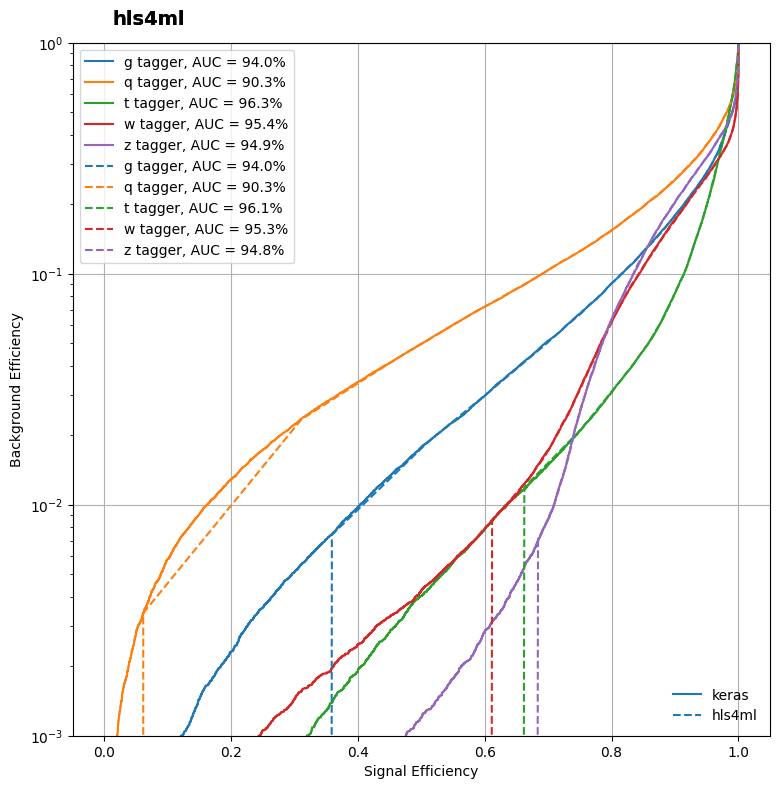

In [12]:
print("Keras  Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
print("hls4ml Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, le.classes_)

plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hls, le.classes_, linestyle='--')

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]

leg = Legend(ax, lines, labels=['keras', 'hls4ml'], loc='lower right', frameon=False)
ax.add_artist(leg)

In [20]:
os.environ['PATH'] += os.pathsep + '/home/onur/Xilinx/Vivado/2023.2/bin/'
os.environ['PATH'] = os.environ['PATH']

In [21]:
hls_model.build(csim=False)
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')

Exception: Vivado HLS installation not found. Make sure "vivado_hls" is on PATH.

In [ ]:
# X_train_val = np.load('X_train_val.npy')
# X_test = np.ascontiguousarray(np.load('X_test.npy'))
# y_train_val = np.load('y_train_val.npy')
# y_test = np.load('y_test.npy', allow_pickle=True)
# classes = np.load('classes.npy', allow_pickle=True)

In [ ]:
# model = load_model('model_1/KERAS_check_best_model.h5')
# y_keras = model.predict(X_test)

In [ ]:
# config = hls4ml.utils.config_from_keras_model(model, granularity='name')
# print("-----------------------------------")
# plotting.print_dict(config)
# print("-----------------------------------")

In [ ]:
# for layer in config['LayerName'].keys():
#     config['LayerName'][layer]['Trace'] = True

# hls_model = hls4ml.converters.convert_from_keras_model(model, hls_config=config, output_dir='model_1/hls4ml_prj_2', part='xcu250-figd2104-2L-e')
# hls4ml.model.profiling.numerical(model=model, hls_model=hls_model, X=X_test[:1000])

In [ ]:
# hls_model.compile()
# hls4ml_pred, hls4ml_trace = hls_model.trace(X_test[:1000])
# keras_trace = hls4ml.model.profiling.get_ymodel_keras(model, X_test[:1000])
# y_hls = hls_model.predict(X_test)

In [ ]:
# print("Keras layer 'fc1', first sample:")
# print(keras_trace['fc1'][0])
# print("hls4ml layer 'fc1', first sample:")
# print(hls4ml_trace['fc1'][0])

In [ ]:
# print("Keras  Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
# print("hls4ml Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))

# fig, ax = plt.subplots(figsize=(9, 9))
# _ = plotting.makeRoc(y_test, y_keras, classes)
# plt.gca().set_prop_cycle(None)  # reset the colors
# _ = plotting.makeRoc(y_test, y_hls, classes, linestyle='--')

# from matplotlib.lines import Line2D

# lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
# from matplotlib.legend import Legend

# leg = Legend(ax, lines, labels=['keras', 'hls4ml'], loc='lower right', frameon=False)
# ax.add_artist(leg)

In [ ]:
# config = hls4ml.utils.config_from_keras_model(model, granularity='Model')
# print("-----------------------------------")
# print(config)
# print("-----------------------------------")
# # Set the ReuseFactor to 2 throughout
# config['Model']['ReuseFactor'] = 2
# hls_model = hls4ml.converters.convert_from_keras_model(
#     model, hls_config=config, output_dir='model_1/hls4ml_prj_2', part='xcu250-figd2104-2L-e'
# )
# hls_model.compile()
# y_hls = hls_model.predict(X_test)
# print("Keras  Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
# print("hls4ml Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))
# plt.figure(figsize=(9, 9))
# _ = plotting.makeRoc(y_test, y_keras, classes)
# plt.gca().set_prop_cycle(None)  # reset the colors
# _ = plotting.makeRoc(y_test, y_hls, classes, linestyle='--')

In [ ]:
# hls_model.build(csim=False)
# hls4ml.report.read_vivado_report('model_1/hls4ml_prj')